# Final Report - Data Science 
## Bachelor in Computer Science / PUCPR

Professor Jean Paul Barddal

Daniel Nowak Assis - daniel.nowak@pucpr.edu.br

Enzo Ramon Campa - colocar email

Leandro Ceron Durau - colocar email

Ivson Soares (Completar nome) - colocar email

2023

# Import the libs you need

In [1]:
# Import all packages you need here
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import json
import sys


pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
sys.path.append("./")

from utils import desc_columns, read_json_dict
# etc

# Loading your data

Below, load the data using pandas and make all the necessary data cleansing so that all data types are correct for posterior analysis.


### Carregamento das Bases
- 1. Dicionário de Dados da Base Sinasc
- 2. Sinasc
- 3. IBGE 2010

In [3]:
# load your data here
df = pd.read_csv("./data/fato/sinasc_binary_python_sorted.csv")

#http://blog.mds.gov.br/redesuas/lista-de-municipios-brasileiros/
MUN_DIN = pd.read_excel("./data/dimensao/Lista-de-Municípios-com-IBGE-Brasil.xlsx", sheet_name=0)
UF_DIN  = pd.read_excel("./data/dimensao/Lista-de-Municípios-com-IBGE-Brasil.xlsx", sheet_name=1)

desc_cols = read_json_dict("./data/dimensao/desc_coluns.json")

df_idh = pd.read_json("./data/dimensao/idh.json")
df = pd.read_csv('./sinasc_checkpoint.csv')

C:\Users\ivson\AppData\Local\Temp\ipykernel_9624\3691331579.py:2: DtypeWarning: Columns (1,2,10,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/fato/sinasc_binary_python_sorted.csv")


In [8]:
# clean and treat the data here

df.shape 

df_idh.shape

MUN_DIN.head(2)

UF_DIN.head(2)

df_idh.head(2)

UF_DIN = UF_DIN[['Estado', 'UF', 'Qtd Mun']]

MUN_DIN = MUN_DIN[['IBGE', 'IBGE7',  'UF', 'Município', 'População 2010']]

df_idh = df_idh.T
df_idh['UF'] = df_idh.index

df.info()

df = df.replace("?", np.nan)

df = df.astype({
                'LOCNASC':    str,
                'IDADEMAE':   float,
                'ESTCIVMAE':  str,
                'QTDFILVIVO': float,
                'QTDFILMORT': float,
                'GRAVIDEZ':   float,
                'PARTO':      str,
                'CONSULTAS':  float,
                'SEXO':       str, 
                'PESO':       float,
                'IDANOMAL':   str,
                'ESCMAE2010': str,
                'QTDGESTANT': float,
                'QTDPARTNOR': float,
                'QTDPARTCES': float,
                'IDADEPAI':   float,
                'TPMETESTIM': str,
                'CONSPRENAT': float,
                'MESPRENAT':  float,
                'TPAPRESENT': str,
                'STTRABPART': str,
                'STCESPARTO': str,
                'TPNASCASSI': str,
                'TPFUNCRESP': str,
                'STDNNOVA':   float, 
                'PARIDADE':   str, 
                'KOTELCHUCK': str, 
                'GESTACAO':   str,
                'STDNEPIDEM': float,
                'PARIDADE':   str
            })

MUN_DIN  = MUN_DIN.rename(columns={"IBGE":"CODMUNNASC"})
df_ibge  = df.merge(MUN_DIN, how="left", on = "CODMUNNASC")\
            .merge(UF_DIN,   how="left", on = "UF")\
            .merge(df_idh,   how="left", on = "UF")

full_df = df_ibge
full_df = desc_columns(full_df, desc_cols)

full_df.head(2)

full_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))
df = df.drop(['Unnamed: 0', 'UF', 'Município', 'ESTADO'], axis = 1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642812 entries, 0 to 2642811
Data columns (total 30 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   CODMUNNASC  int64 
 1   LOCNASC     object
 2   IDADEMAE    object
 3   ESTCIVMAE   object
 4   QTDFILVIVO  object
 5   QTDFILMORT  object
 6   GRAVIDEZ    object
 7   PARTO       object
 8   CONSULTAS   object
 9   SEXO        int64 
 10  PESO        object
 11  IDANOMAL    object
 12  ESCMAE2010  object
 13  QTDGESTANT  object
 14  QTDPARTNOR  object
 15  QTDPARTCES  object
 16  IDADEPAI    object
 17  TPMETESTIM  object
 18  CONSPRENAT  object
 19  MESPRENAT   object
 20  TPAPRESENT  object
 21  STTRABPART  object
 22  STCESPARTO  object
 23  TPNASCASSI  object
 24  TPFUNCRESP  object
 25  STDNEPIDEM  object
 26  STDNNOVA    int64 
 27  PARIDADE    int64 
 28  KOTELCHUCK  object
 29  GESTACAO    int64 
dtypes: int64(5), object(25)
memory usage: 604.9+ MB


,CODMUNNASC,IDADEMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,CONSULTAS,PESO,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,CONSPRENAT,MESPRENAT,STDNEPIDEM,STDNNOVA,IBGE7,População 2010,Qtd Mun,IDH
count,2642812.00000,2642776.00000,2595780.00000,2563441.00000,2641404.00000,2630028.00000,2642374.00000,2581759.00000,2559851.00000,2549221.00000,919880.00000,2595710.00000,2580334.00000,2642810.00000,2642812.00000,2642808.00000,2642803.00000,2642808.00000,2642808.00000
mean,318529.26235,27.28197,1.03657,0.25660,1.02250,3.65592,3178.91321,1.27266,0.68148,0.39186,31.90625,8.72823,4.56899,0.00002,0.99993,3185295.85300,1294809.37328,358.99655,0.76932
std,100472.95344,6.77283,1.27138,0.62683,0.15160,0.64903,563.15643,1.47134,1.25558,0.72730,7.76518,6.64819,14.26658,0.00464,0.00830,1004729.62265,2736679.21569,258.29171,0.04045
min,110001.00000,8.00000,0.00000,0.00000,1.00000,1.00000,3.00000,0.00000,0.00000,0.00000,9.00000,0.00000,1.00000,0.00000,0.00000,1100015.00000,1714.00000,1.00000,0.69400
25%,251370.00000,22.00000,0.00000,0.00000,1.00000,3.00000,2900.00000,0.00000,0.00000,0.00000,26.00000,6.00000,2.00000,0.00000,1.00000,2513703.00000,66803.00000,144.00000,0.72700
50%,320500.00000,27.00000,1.00000,0.00000,1.00000,4.00000,3215.00000,1.00000,0.00000,0.00000,32.00000,8.00000,2.00000,0.00000,1.00000,3205002.00000,218008.00000,246.00000,0.78000
75%,355030.00000,32.00000,2.00000,0.00000,1.00000,4.00000,3525.00000,2.00000,1.00000,1.00000,37.00000,10.00000,3.00000,0.00000,1.00000,3550308.00000,932748.00000,645.00000,0.80300
max,530010.00000,99.00000,99.00000,99.00000,3.00000,4.00000,7000.00000,99.00000,99.00000,99.00000,99.00000,99.00000,99.00000,1.00000,1.00000,5300108.00000,11253503.00000,853.00000,0.82900


In [ ]:
# use as many code and text cells you wish

# General Characteristics

In this section, you should report the main dataset chracteristics, including but not limited to:
* Number of instances
* Number of features
* Number of classes
* Class distribution

In [11]:
# use as many code and text cells you wish
shape = df.shape
print(f"The dataset has {shape[0]} instances and {shape[1] - 1} features")

The dataset has 2642812 instances and 30 features


In [12]:
print(f"The dataset has {df['GESTACAO'].nunique()} classes")

The dataset has 2 classes


In [19]:
value_counts = df['GESTACAO'].value_counts()
print(f"class 0 has {value_counts[0]} samples and class 1 has {value_counts[1]} samples")

class 0 has 2339162 samples and class 1 has 303650 samples


# Univariate data analysis

In this section, you should perform univariate data analysis on at least 20 variables. 

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (gaussian, binomial, exponential, etc)
2. Skew
3. Kurtosis
4. Mean, standard deviation, and what they stand for in the context of the dataset

Regardless of the type of the variable being analyzed, make sure you plot it correctly. For instance, make sure scatterplots are not used for categorical data and so forth.

In [ ]:
# place as many cells to plot the visualizations, 
# as well as to describe the main findings

### Qual é a Frequência dos Tipos de Assistência do Parto


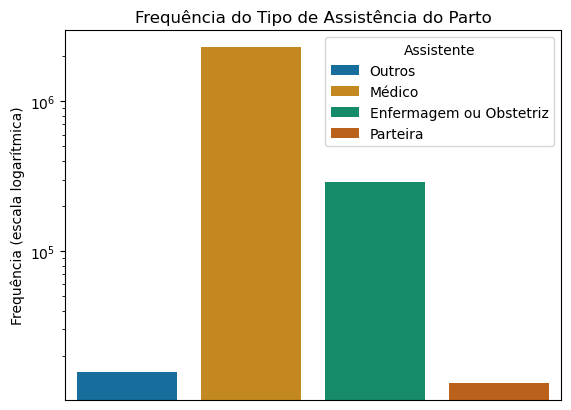

In [5]:
assist_parto = full_df[['TPNASCASSI']].rename(columns={"TPNASCASSI":"Assistente"})
ax = sns.countplot(data=assist_parto[assist_parto['Assistente'] != 'nan'], x='Assistente', hue='Assistente', dodge=False, palette='colorblind')
ax.set_yscale('log')
ax.set(xlabel=None)
plt.ylabel('Frequência (escala logarítmica)')
plt.title("Frequência do Tipo de Assistência do Parto")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.show()

### Com base no gráfico acima podemos observar que apesar da assistência médica durante o parto ser mais comum, a soma dos outros tipos correspondem a quase metade do total. Dessa forma, fica evidente que um parto não é um procedimento predominantemente médico


## Qual a distribuição dos tipos de apresentação do Recém Nascido na hora do parto


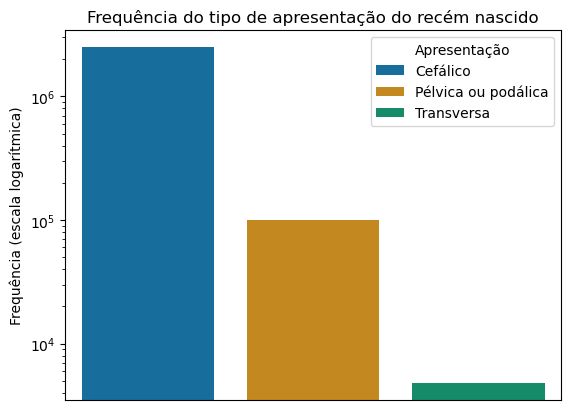

In [6]:
aprs_rn = full_df[['TPAPRESENT']].rename(columns={"TPAPRESENT":"Apresentação"})
ax = sns.countplot(data=aprs_rn[aprs_rn['Apresentação'] != 'nan'], x='Apresentação', hue='Apresentação', dodge=False, palette='colorblind')
ax.set_yscale('log')
ax.set(xlabel=None)

plt.ylabel('Frequência (escala logarítmica)')
plt.title("Frequência do tipo de apresentação do recém nascido")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.show()

### A apresentação cefálica é a mais comum, apesar da apresentação pélvica também ser relevante. Complicações relacionadas ao tipo de apresentação depende de outros fatores, contudo fica claro que a transversal é um evento raro, o que contribui para um parto mais seguro


## Levanto em conta que o parto não é predominantemente um procedimento médico e que a apresentação do recém nascido contribui para um parto normal, qual é a distribuição dos tipos de parto


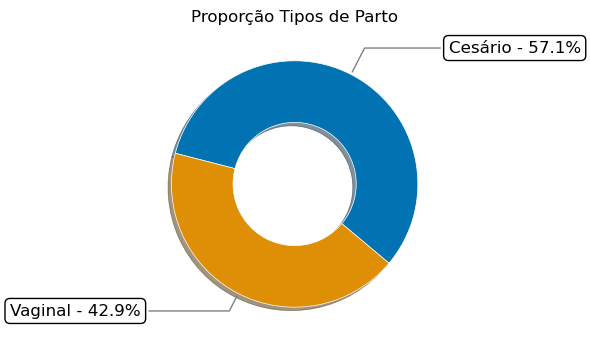

In [7]:
palette_color = sns.color_palette('colorblind')
gp_parto = full_df[(full_df['PARTO'] != 'nan') & (full_df['PARTO'] != 'Ignorado') ]\
                .groupby('PARTO')\
                .agg(contagem=("PARTO", 'count'))\
                .reset_index()

palette_color = sns.color_palette('colorblind')

fig, ax = plt.subplots(figsize=(12, 4), subplot_kw=dict(aspect="equal"))
labels = gp_parto['PARTO'].unique()
wedges, texts= ax.pie(x=gp_parto['contagem'], pctdistance=0.8, colors=palette_color, 
                               wedgeprops=dict(width=0.5, edgecolor='w', linewidth=0.5),
                               shadow=True,
                               startangle=-40)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    percentage_value = f"{gp_parto['contagem'].values[i] / sum(gp_parto['contagem']) * 100:.1f}%"
    ax.annotate(f"{labels[i]} - {percentage_value}", xy=(x, y), xytext=(1.25 * np.sign(x), 1.2 * y),
                fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='w', lw=1),
                horizontalalignment=horizontalalignment,
                arrowprops=dict(arrowstyle="-", lw=1, color='grey', connectionstyle=connectionstyle))

plt.title("Proporção Tipos de Parto")
plt.show()

### Apesar dos resultados obtidos nos primeiros gráficos(Tipo de Assistente, Tipo de Apresentação do Recém Nascido), o parto Vaginal(normal) não é predominante. Esse é um tema debatido na sociedade atualmente, porém com o conjunto de dados atual, somado ao escopo do estudo, não mergulharemos nesse linha de investigação.


### TODO - Investigar idade da mãe


## Sabemos que o fato de gerar um pessoa custa tempo e esforço, principalmente da genitora. Dessa forma, qual seria o impacto na educação dessas mulheres


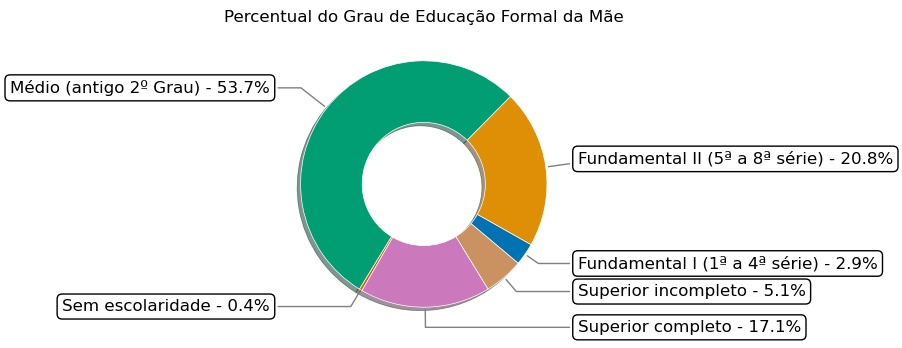

In [8]:
esc_mae = full_df[full_df['ESCMAE2010'] != 'nan'].groupby('ESCMAE2010').agg(contagem=('ESCMAE2010', 'count')).reset_index()
palette_color = sns.color_palette('colorblind')

fig, ax = plt.subplots(figsize=(12, 4), subplot_kw=dict(aspect="equal"))
labels = esc_mae['ESCMAE2010'].unique()
wedges, texts= ax.pie(x=esc_mae['contagem'], pctdistance=0.8, colors=palette_color, 
                               wedgeprops=dict(width=0.5, edgecolor='w', linewidth=0.5),
                               shadow=True,
                               startangle=-40)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    percentage_value = f"{esc_mae['contagem'].values[i] / sum(esc_mae['contagem']) * 100:.1f}%"
    ax.annotate(f"{labels[i]} - {percentage_value}", xy=(x, y), xytext=(1.25 * np.sign(x), 1.2 * y),
                fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='w', lw=1),
                horizontalalignment=horizontalalignment,
                arrowprops=dict(arrowstyle="-", lw=1, color='grey', connectionstyle=connectionstyle))

plt.title("Percentual do Grau de Educação Formal da Mãe")
plt.show()

### Apesar de 82,9% dessas mulheres não completarem o ensino superior não podemos inferir que esta seja a causa desse problema devido aos diversos fatores o compõe, contudo podemos observar como o grau de escolaridade impacta na quantidade de filhos


## Atualmente muito se discute sobre antinatalismo, nesse sentido o que nossos dados nos contam sobre isso


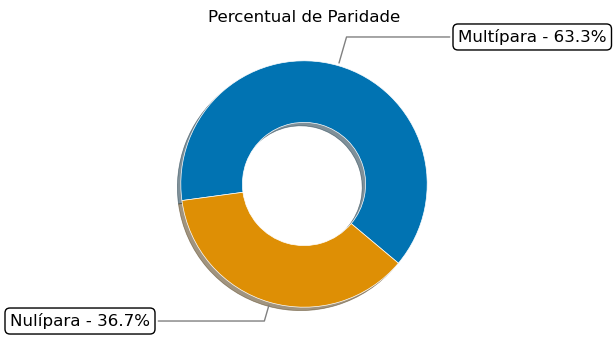

In [9]:
par_mae = full_df[full_df['PARIDADE'] != 'nan'].groupby('PARIDADE').agg(contagem=('PARIDADE', 'count')).reset_index()
palette_color = sns.color_palette('colorblind')

fig, ax = plt.subplots(figsize=(12, 4), subplot_kw=dict(aspect="equal"))
labels = par_mae['PARIDADE'].unique()
wedges, texts= ax.pie(x=par_mae['contagem'], pctdistance=0.8, colors=palette_color, 
                               wedgeprops=dict(width=0.5, edgecolor='w', linewidth=0.5),
                               shadow=True,
                               startangle=-40)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    percentage_value = f"{par_mae['contagem'].values[i] / sum(par_mae['contagem']) * 100:.1f}%"
    ax.annotate(f"{labels[i]} - {percentage_value}", xy=(x, y), xytext=(1.25 * np.sign(x), 1.2 * y),
                fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='w', lw=1),
                horizontalalignment=horizontalalignment,
                arrowprops=dict(arrowstyle="-", lw=1, color='grey', connectionstyle=connectionstyle))
plt.title("Percentual de Paridade")
plt.show()

### Relacionar isso ao movimento antinatalista pode ser um exagero, porém como pode ser obversado é mais provável que alguém que já teve um filho tenha outro.

# Multivariate data analysis

In this section, you should plot at least 8 multivariate visualizations. The key here is to investigate underlying correlations and behaviors in the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **TWO** non-obvious behavior in data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. The key here is to explain why you are choosing those specific variables together and what you are expecting to find.
2. Determine what kind of visualization is the most suited.
3. Report the findings and whether they corroborate or not the aforestated hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For instance, try PCA, t-SNE, and even other techniques we have not worked with during the lectures. The key here is to start to develop a critical mindset towards data analysis and our own work.

### Important

It is strictly forbidden to create multivariate visualizations using variables that were not used in the previous section (univariate analysis).

In [ ]:
# again, feel free to place as many cells to plot the visualizations, 
# as well as describe to the main findings

### Qual a relação entre o número de gestações e a escolaridade

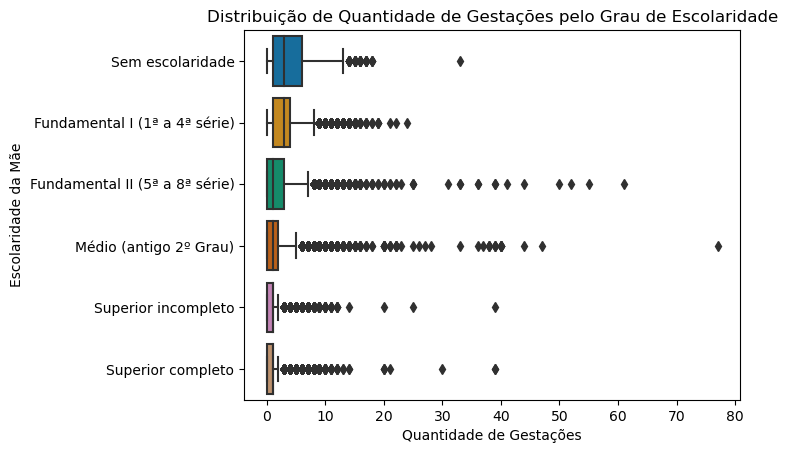

In [10]:
esc_gest = full_df[(full_df['QTDGESTANT'] < 99) &  (full_df['ESCMAE2010'] != 'nan')]
sns.boxplot(y=esc_gest['ESCMAE2010'], x=esc_gest['QTDGESTANT'], orient='h', palette='colorblind')
plt.xlabel("Quantidade de Gestações")
plt.ylabel("Escolaridade da Mãe")
plt.title("Distribuição de Quantidade de Gestações pelo Grau de Escolaridade")
plt.show()

### Qual a distribuição das mulheres gestantes pela escolaridade e estado civil


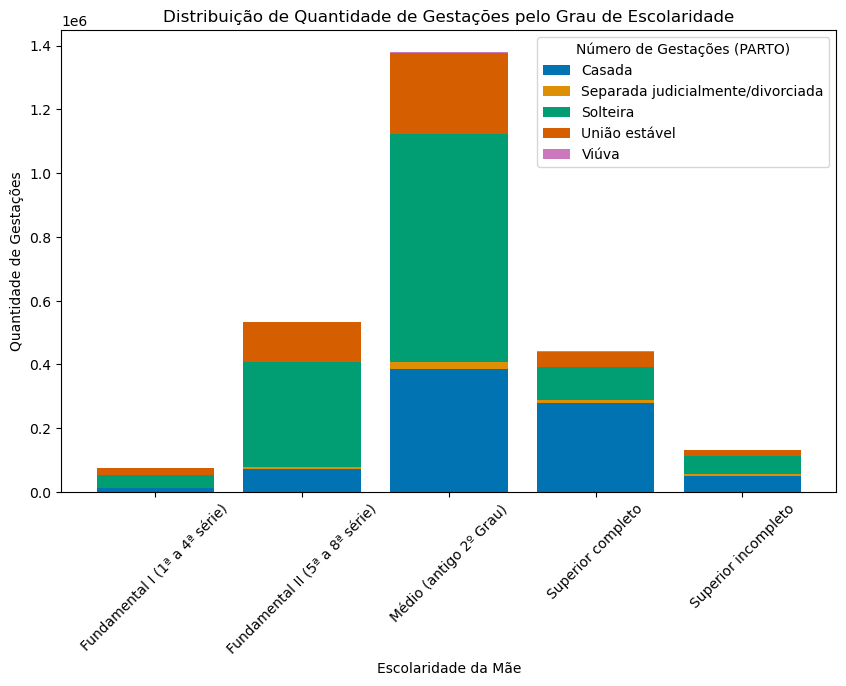

In [12]:
esc_tp_par = full_df[(full_df['ESCMAE2010']      != 'nan') & (full_df['ESCMAE2010']      != 'Sem escolaridade') &
                     (full_df['ESTCIVMAE'] != "nan") & (full_df['ESTCIVMAE'] != "Ignorado")]

count_data = esc_tp_par.groupby(['ESTCIVMAE', 'ESCMAE2010']).size().reset_index(name='Count')

# Pivot the DataFrame to create a format suitable for a stacked bar chart
pivot_data = count_data.pivot(index='ESCMAE2010', columns='ESTCIVMAE', values='Count').fillna(0)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
sns.set_palette('colorblind')
ax = sns.barplot(data=pivot_data, x=pivot_data.index, y=pivot_data.sum(axis=1))
bottom = 0

for col in pivot_data.columns:
    ax.bar(pivot_data.index, pivot_data[col], label=col, bottom=bottom)
    bottom += pivot_data[col]


plt.xlabel("Escolaridade da Mãe")
plt.ylabel("Quantidade de Gestações")
plt.title("Distribuição de Quantidade de Gestações pelo Grau de Escolaridade")
plt.legend(title='Número de Gestações (PARTO)')
plt.xticks(rotation=45)
plt.show()

### Podemos ver que quanto maior o grau de escolaridade mais mulheres se encontram em estado civil casada. Contudo, o mais interessante é observarmos como a união estável é um estado civil que se aproxima ou ultrapassa a quantidade de casamentos nos graus mais baixos de escolaridadeices here

# Final Plots

In this section, you need to enhance 3 multivariate visualizations that were presented in the previous section of the report.
The key here is to enhance these visualizations with the goal of presenting them for an audience that is not familiar with the dataset used or with data analysis.
**Therefore, make sure that its size, colors, textures, etc, are appropriate are convey the right information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot
2. Provide a description of the visualization, including the main findings that we can extract from it


**Hint: take a look at the checklist also made available based on the work of Evergreen.**

In [ ]:
# your code goes here

# Digest

In this section you should write down all the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2500 characters (no spaces).

```
Add your text here.
```

# Final Steps


1. Save this report as a jupyter notebook (`.ipynb`)
2. Save a copy of this report as a PDF file (`.pdf`)
3. Copy the dataset
4. Zip it all together within a single file (`<your_team_name>.zip`)
5. Send it over using Blackboard.